In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import os
# --- Download and Load Dataset ---
file_id = '1uD1UMXT2-13GQkb_H9NmEOyUVI-zKyl6'
output_path = 'furniture_data.csv'
df = None

# Check if the file already exists to avoid re-downloading
if not os.path.exists(output_path):
    print(f"Downloading dataset from Google Drive to '{output_path}'...")
    try:
        gdown.download(id=file_id, output=output_path, quiet=False)
        print("Download complete.")
    except Exception as e:
        print(f"An error occurred during download: {e}")
else:
    print(f"Dataset '{output_path}' already exists. Loading from disk.")

# Load the dataset from the downloaded file
if os.path.exists(output_path):
    try:
        df = pd.read_csv(output_path)
    except Exception as e:
        print(f"Failed to load the CSV file: {e}")




Downloading...
From: https://drive.google.com/uc?id=1uD1UMXT2-13GQkb_H9NmEOyUVI-zKyl6
To: /Users/jatinaggarwal/Documents/GitHub/Recommendation-System/Training/furniture_data.csv
100%|██████████| 333k/333k [00:03<00:00, 91.1kB/s]

Download complete.


In [2]:
# --- Exploratory Data Analysis (EDA) ---

print("\nDataset Head:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())




Dataset Head:
                                               title            brand  \
0  GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...           GOYMFK   
1  subrtex Leather ding Room, Dining Chairs Set o...          subrtex   
2  Plant Repotting Mat MUYETOL Waterproof Transpl...          MUYETOL   
3  Pickleball Doormat, Welcome Doormat Absorbent ...          VEWETOL   
4  JOIN IRON Foldable TV Trays for Eating Set of ...  JOIN IRON Store   

                                         description   price  \
0  multiple shoes, coats, hats, and other items E...  $24.99   
1                     subrtex Dining chairs Set of 2     NaN   
2                                                NaN   $5.98   
3  The decorative doormat features a subtle textu...  $13.99   
4  Set of Four Folding Trays With Matching Storag...  $89.99   

                                          categories  \
0  ['Home & Kitchen', 'Storage & Organization', '...   
1  ['Home & Kitchen', 'Furniture', 'Dining Room F

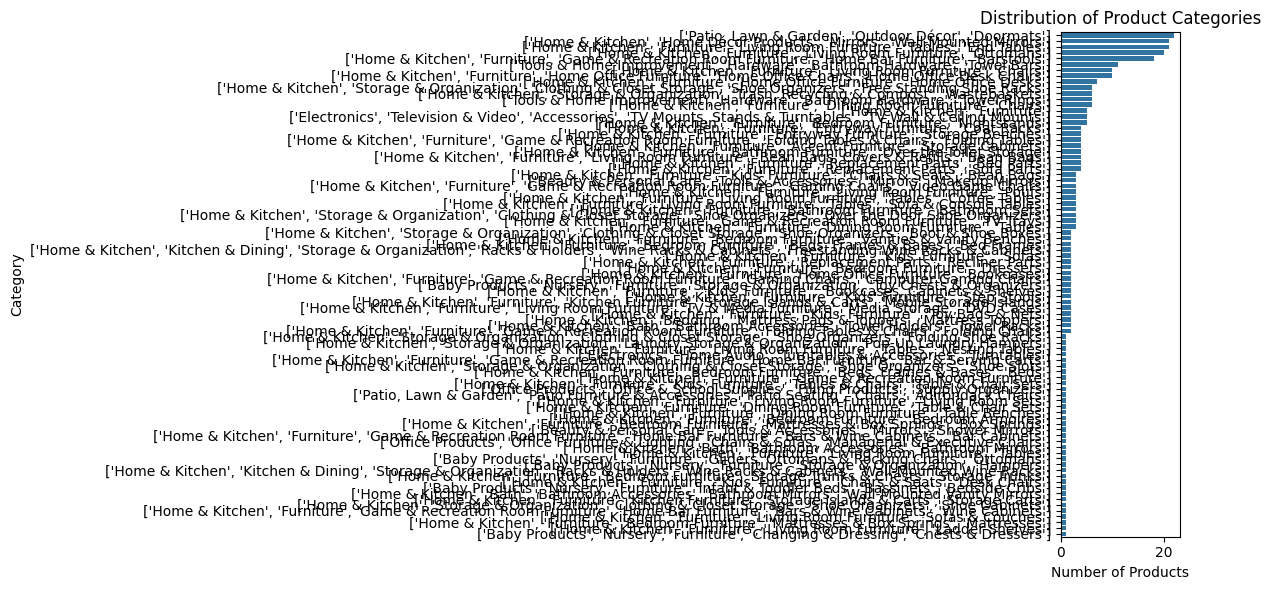

In [3]:
# 1. Product Categories Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='categories', data=df, order = df['categories'].value_counts().index)
plt.title('Distribution of Product Categories')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


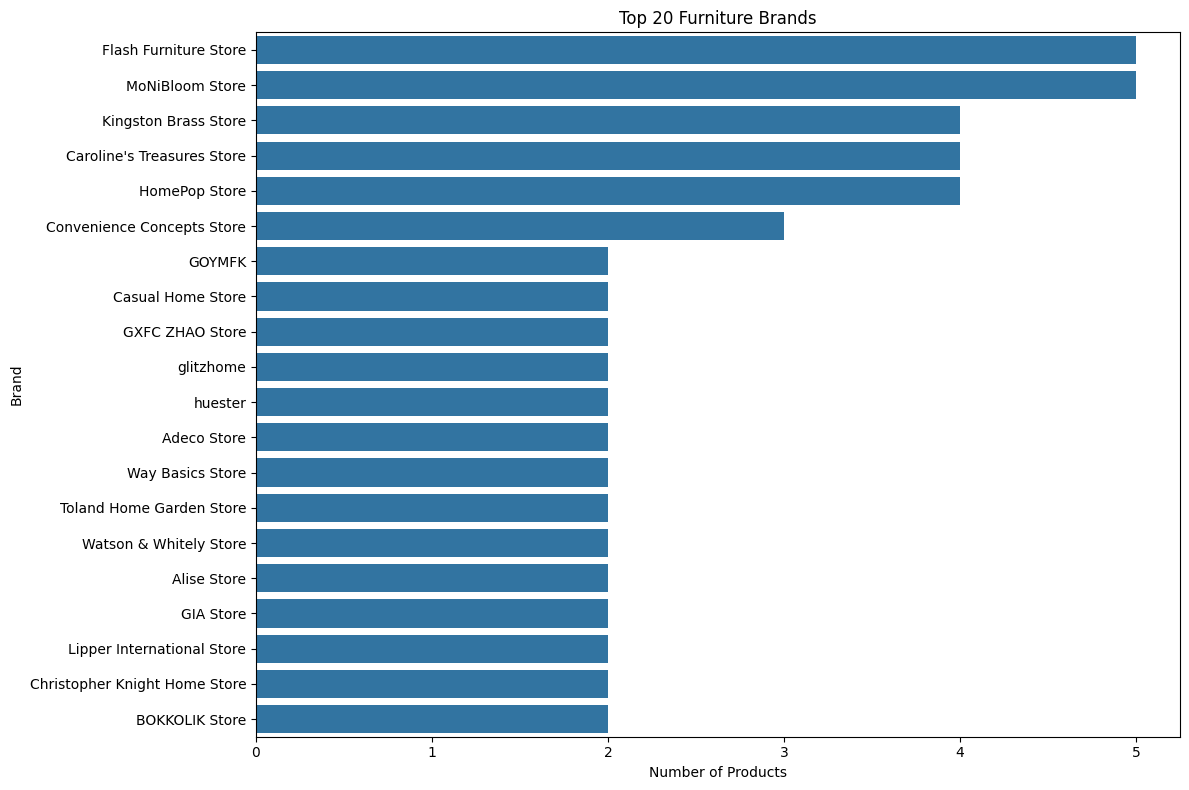

In [4]:
# 2. Brand Distribution
plt.figure(figsize=(12, 8))
# Show top 20 brands
top_brands = df['brand'].value_counts().nlargest(20)
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title('Top 20 Furniture Brands')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


In [6]:
if 'price' in df.columns and df['price'].dtype == 'object':
    print("\nCleaning the 'price' column...")
    # Remove any characters that are not digits or a decimal point
    df['price'] = df['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
    # Convert the column to numeric, coercing errors to NaN
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    print("'price' column converted to numeric.")



Cleaning the 'price' column...
'price' column converted to numeric.


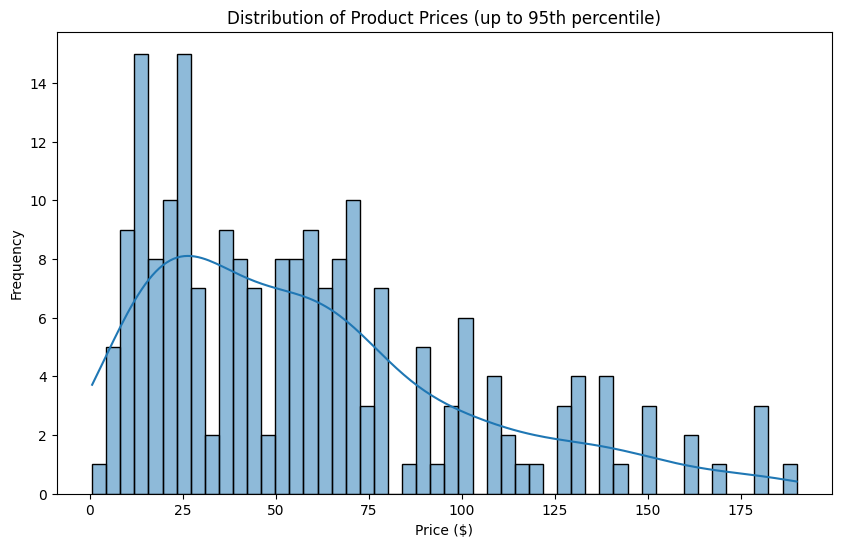

In [7]:
# 3. Price Distribution
plt.figure(figsize=(10, 6))
# Remove outliers for better visualization
price_filtered = df[df['price'].notna() & (df['price'] < df['price'].quantile(0.95))]
sns.histplot(price_filtered['price'], bins=50, kde=True)
plt.title('Distribution of Product Prices (up to 95th percentile)')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


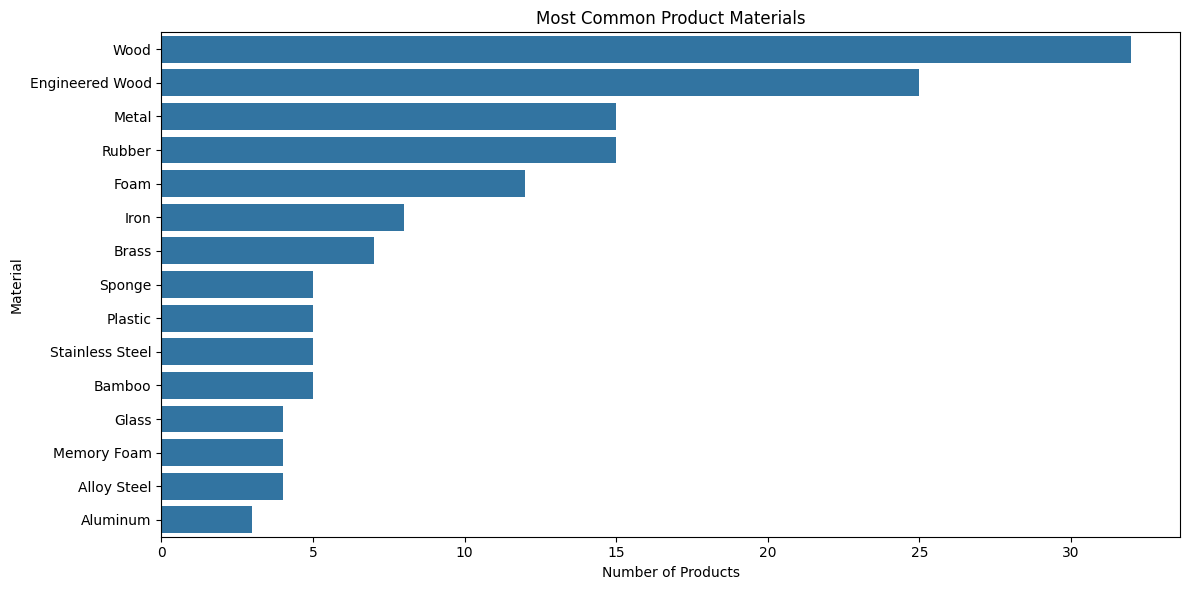

In [8]:
# 4. Material Analysis
plt.figure(figsize=(12, 6))
top_materials = df['material'].value_counts().nlargest(15)
sns.barplot(x=top_materials.values, y=top_materials.index)
plt.title('Most Common Product Materials')
plt.xlabel('Number of Products')
plt.ylabel('Material')
plt.tight_layout()
plt.show()
